In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer


In [2]:
train_total_df = pd.read_csv("final_train_2.csv")

print("Number of data points:",train_total_df.shape[0])

Number of data points: 420285


In [59]:
test_total_df = pd.read_csv("final_test_2.csv")

print("Number of data points:",test_total_df.shape[0])

Number of data points: 115064


In [19]:
test_total_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,...,before_Christmas_Day,low_sales_dep,last_year_sales,year,last_year_week_dept_sales,high_week_sales_dept,low_week_sales_dept,monthly_sales,prev_week,nxt_week
0,0,0,0,0,1,1,2012-11-02,False,55.32,3.386,...,0,0,19980.955,2012,30051.833333,0,0,98537.51,31579.90,18689.54
1,1,1,1,39,1,2,2012-11-02,False,55.32,3.386,...,0,0,44598.030,2012,44644.163333,0,0,180507.46,41682.40,44936.47
2,2,2,2,78,1,3,2012-11-02,False,55.32,3.386,...,0,0,9638.600,2012,9523.346667,0,0,38570.76,9421.20,9959.64
3,3,3,3,117,1,4,2012-11-02,False,55.32,3.386,...,0,0,38505.710,2012,36809.540000,0,0,160402.08,34247.26,36826.52
4,4,4,4,156,1,5,2012-11-02,False,55.32,3.386,...,0,0,31479.360,2012,29783.503333,0,0,169638.24,26391.79,31002.65


In [23]:
new_2010=train_total_df[train_total_df['year']==2010] 
new_2010=new_2010[new_2010['Store']== 33]
new_2010=new_2010[new_2010['Dept']== 1]
new_2011=train_total_df[train_total_df['year']==2011 ]
new_2011=new_2011[new_2011['Store']==33]
new_2011=new_2011[new_2011['Dept']== 1]
new_2012=train_total_df[train_total_df['year']==2012]
new_2012=new_2012[new_2012['Store']== 33]
new_2012=new_2012[new_2012['Dept']== 1]

In [183]:
train_high_week_sales_dept=[]
test_high_week_sales_dept=[]

In [6]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 
        

In [195]:
def get_high_sales_weeks(store):
    print(store)
    new_all=train_total_df[train_total_df['Store']== store]
    dict_obj = my_dictionary() 
    for i in range(103):
        new_all_=new_all[new_all['Dept']== i]
        if new_all_.empty:
            continue
        else:
            sort_all=new_all_.sort_values('Weekly_Sales')
            high_sales=pd.DataFrame(sort_all.tail(n=10))
            list_high=high_sales['week_of_year'].values.tolist()
            dict_obj.add(str(str(store)+'_'+str(i)),list(unique_everseen(duplicates(list_high))))
            
            
    for i,row in train_total_df.iterrows():
    
        key=str(str(row['Store'])+'_'+str(row['Dept']))

        if key in dict_obj.keys() :
            list_value=dict_obj[key]

            if row['week_of_year'] in list_value:
                train_high_week_sales_dept[i]=1
                
                
    for i,row in test_total_df.iterrows():
    
        key=str(str(row['Store'])+'_'+str(row['Dept']))

        if key in dict_obj.keys() :
            list_value=dict_obj[key]

            if row['week_of_year'] in list_value:
                test_high_week_sales_dept[i]=1



In [185]:
new_all=train_total_df[train_total_df['Store']== 1]
dict_obj = my_dictionary() 

In [189]:
len(test_high_week_sales_dept)


115064

In [65]:
sort_2010=new_2010.sort_values('Weekly_Sales')
sort_2010.tail(n=10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,...,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep,last_year_sales,year,last_year_week_dept_sales
131459,131459,131821,131821,45,1,1,2010-12-17,44912.86,False,49.84,...,0,0,0,51,12,0,0,19551.115,2010,24278.500000
284255,284255,285089,285089,97,1,1,2011-12-16,45773.03,False,51.63,...,0,0,0,50,12,0,0,31497.650,2011,32976.023333
2948,2948,2955,2955,1,1,1,2010-02-12,46039.49,True,38.51,...,0,0,0,7,2,0,0,0.000,2010,0.000000
287255,287255,288102,288102,98,1,1,2011-12-23,46788.75,False,47.96,...,0,0,0,51,12,1,0,31497.650,2011,44113.913333
157790,157790,158238,158238,54,1,1,2011-02-18,46845.87,False,57.36,...,0,0,0,7,2,0,0,33260.025,2011,37519.846667
184237,184237,184767,184767,63,1,1,2011-04-22,50510.31,False,72.99,...,0,0,0,16,4,0,0,17596.960,2011,25567.740000
311031,311031,311960,311960,106,1,1,2012-02-17,54060.10,False,45.32,...,0,0,0,7,2,0,0,29776.465,2012,34698.956667
134412,134412,134780,134780,46,1,1,2010-12-24,55931.23,False,52.33,...,0,0,0,52,12,1,0,19551.115,2010,32976.023333
23566,23566,23627,23627,8,1,1,2010-04-02,57258.43,False,62.27,...,0,0,0,14,4,0,0,21982.270,2010,23136.413333
331801,331801,332778,332778,113,1,1,2012-04-06,57592.12,False,70.43,...,0,0,0,14,4,0,0,28762.370,2012,24344.750000


In [61]:
sort_2011=new_2011.sort_values('Weekly_Sales')
sort_2011.tail(n=5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,...,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep,last_year_sales,year,last_year_week_dept_sales
187188,187188,187722,187722,64,1,1,2011-04-29,41512.39,False,72.03,...,0,0,0,17,4,0,0,17596.960,2011,16765.806667
284255,284255,285089,285089,97,1,1,2011-12-16,45773.03,False,51.63,...,0,0,0,50,12,0,0,31497.650,2011,32976.023333
287255,287255,288102,288102,98,1,1,2011-12-23,46788.75,False,47.96,...,0,0,0,51,12,1,0,31497.650,2011,44113.913333
157790,157790,158238,158238,54,1,1,2011-02-18,46845.87,False,57.36,...,0,0,0,7,2,0,0,33260.025,2011,37519.846667
184237,184237,184767,184767,63,1,1,2011-04-22,50510.31,False,72.99,...,0,0,0,16,4,0,0,17596.960,2011,25567.740000


In [62]:
sort_2012=new_2012.sort_values('Weekly_Sales')
sort_2012.tail(n=5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,...,Next_Week_Of_Thanksgiving,Next_Holiday_Week_Of_Thanksgiving,Next_Week_Of_Christmas,week_of_year,month_of_year,before_Christmas_Day,low_sales_dep,last_year_sales,year,last_year_week_dept_sales
328847,328847,329817,329817,112,1,1,2012-03-30,28952.86,False,67.61,...,0,0,0,13,3,0,0,20607.665,2012,21717.660000
334775,334775,335761,335761,114,1,1,2012-04-13,34684.21,False,69.07,...,0,0,0,15,4,0,0,28762.370,2012,34382.156667
308037,308037,308959,308959,105,1,1,2012-02-10,36988.49,True,48.02,...,0,0,0,6,2,0,0,29776.465,2012,35466.266667
311031,311031,311960,311960,106,1,1,2012-02-17,54060.10,False,45.32,...,0,0,0,7,2,0,0,29776.465,2012,34698.956667
331801,331801,332778,332778,113,1,1,2012-04-06,57592.12,False,70.43,...,0,0,0,14,4,0,0,28762.370,2012,24344.750000


In [30]:
store_repl=[]
for i,row in new_2010.iterrows():
    store_repl.append(int(row['week_of_year'])-1)
        

In [31]:
new_2010['new_week_of_year']=store_repl

In [24]:
ts = new_2010.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts = ts.set_index('week_of_year')
ts.index

Int64Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
            23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
           dtype='int64', name='week_of_year')

In [25]:
ts1 = new_2011.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts1 = ts1.set_index('week_of_year')
ts1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52],
           dtype='int64', name='week_of_year')

In [26]:
ts2 = new_2012.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts2 = ts2.set_index('week_of_year')
ts2.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43],
           dtype='int64', name='week_of_year')

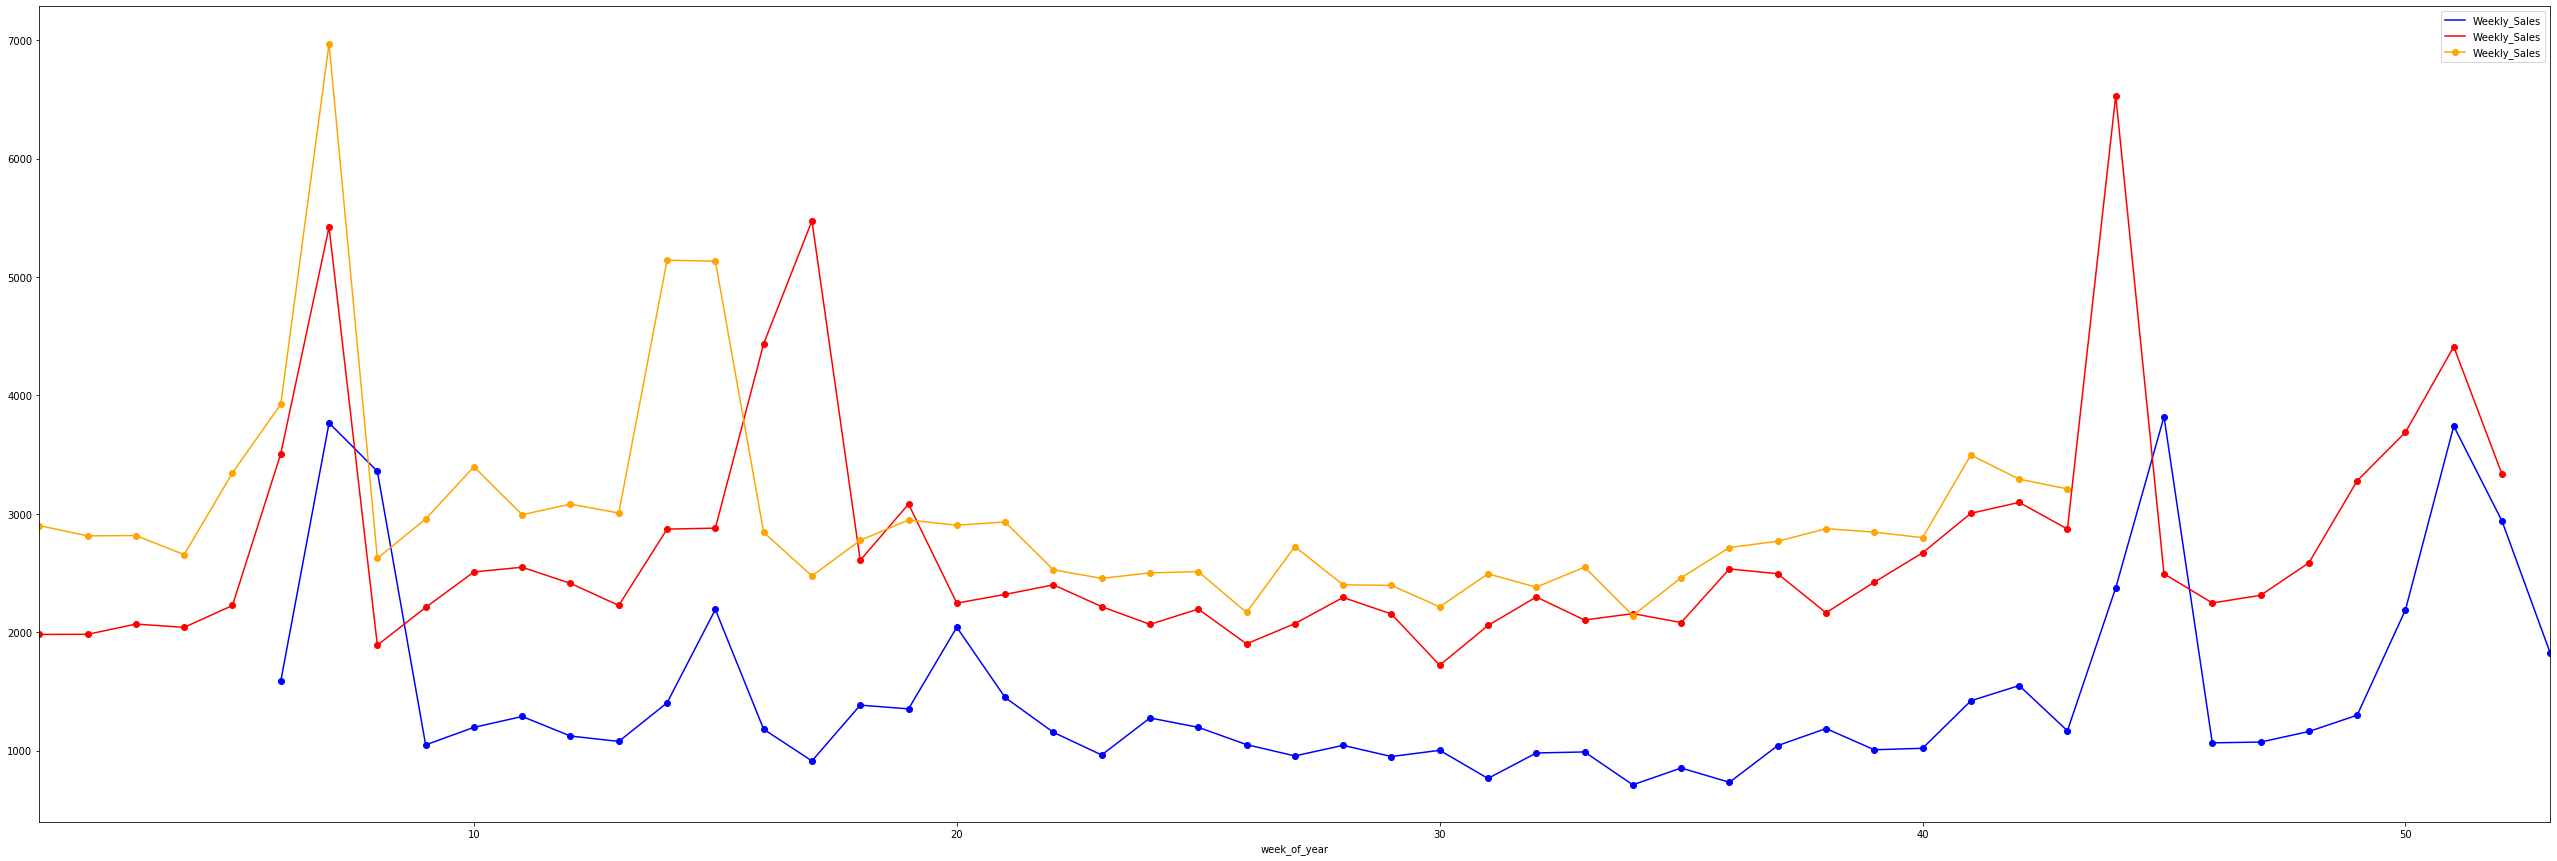

In [27]:
ax = ts.plot(figsize=(45,15),marker='o',color='blue')
ax=ts1.plot(ax=ax,figsize=(45,15),marker='o',color='red')
ts2.plot(ax=ax,figsize=(45,15),marker='o',color='orange')

In [9]:
ts2.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52],
           dtype='int64', name='week_of_year')

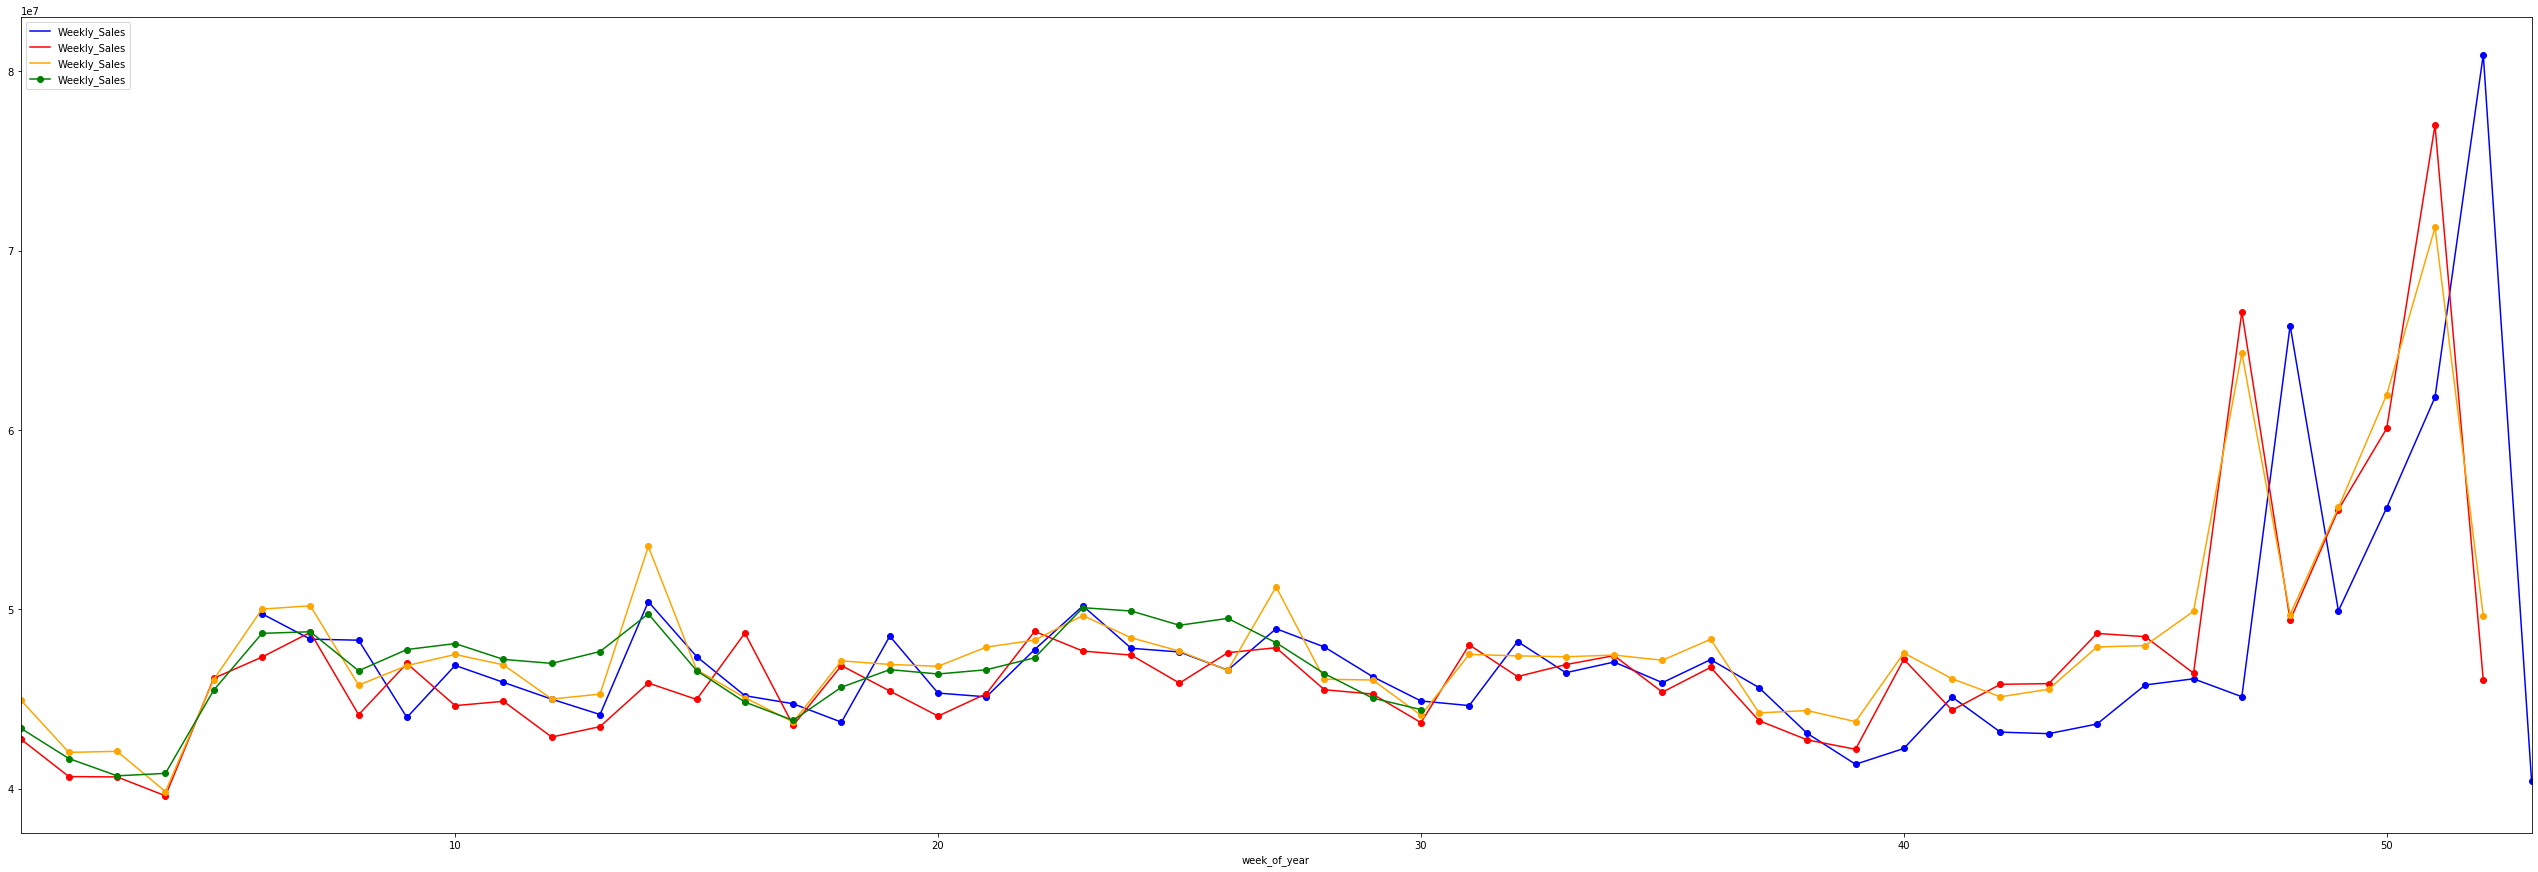

In [16]:
new_2010=test_total_df[test_total_df['year']==2010] 
#new_2010=new_2010[new_2010['Store']== 1]
#new_2010=new_2010[new_2010['Dept']== 4]
new_2011=test_total_df[test_total_df['year']==2011 ]
#new_2011=new_2011[new_2011['Store']==1]
#new_2011=new_2011[new_2011['Dept']== 4]
new_2012=test_total_df[test_total_df['year']==2012]
#new_2012=new_2012[new_2012['Store']== 1]
#new_2012=new_2012[new_2012['Dept']== 4]
new_2013=test_total_df[test_total_df['year']==2013]
#new_2013=new_2013[new_2013['Store']== 1]
#new_2013=new_2013[new_2013['Dept']== 4]



ts = new_2010.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts = ts.set_index('week_of_year')


ts1 = new_2011.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts1 = ts1.set_index('week_of_year')


ts2 = new_2012.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts2 = ts2.set_index('week_of_year')

ts3 = new_2013.groupby('week_of_year')['Weekly_Sales'].sum().reset_index()
ts3 = ts3.set_index('week_of_year')



ax = ts.plot(figsize=(45,15),marker='o',color='blue')
ax=ts1.plot(ax=ax,figsize=(45,15),marker='o',color='red')
ax=ts2.plot(ax=ax,figsize=(45,15),marker='o',color='orange')
ts3.plot(ax=ax,figsize=(45,15),marker='o',color='green')


In [20]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

In [67]:
week_of_the_month=[]
current_week=1
current_month=2
current_year_week=6
for i,row in train_total_df.iterrows():
    if current_month == row['month_of_year'] and current_year_week != row['week_of_year']:
        current_week=current_week+1
        week_of_the_month.append(current_week)
        
    else:
        if current_month == row['month_of_year']:
            week_of_the_month.append(current_week)
        else:
            week_of_the_month.append(1)
            current_week=1
            current_month=row['month_of_year']
            
            
    current_year_week=row['week_of_year']
        

In [69]:
week_of_the_month=[]
current_week=1
current_month=11
current_year_week=44
for i,row in test_total_df.iterrows():
    if current_month == row['month_of_year'] and current_year_week != row['week_of_year']:
        current_week=current_week+1
        week_of_the_month.append(current_week)
        
    else:
        if current_month == row['month_of_year']:
            week_of_the_month.append(current_week)
        else:
            week_of_the_month.append(1)
            current_week=1
            current_month=row['month_of_year']
            
            
    current_year_week=row['week_of_year']
        

In [70]:
df = pd.DataFrame(week_of_the_month, 
               columns =['week_of_the_month']) 
df.to_csv('test_week_of_the_month.csv') 

In [11]:
# Main Function 
dict_obj = my_dictionary() 
for i,row in train_total_df.iterrows():
    dict_obj.add(str(str(row['year'])+'_'+str(row['month_of_year'])+'_'+str(row['Store'])+'_'+str(row['Dept'])),row['Weekly_Sales'])


In [32]:
train_prev_week=[]
train_nxt_week=[]
for i,row in train_total_df.iterrows():
    key_t1=str(str(row['year'])+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    key_t2=str(str(row['year'])+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))

    if key_t1 in  dict_obj.keys(): 
        train_prev_week.append(dict_obj[key_t1])
    else:
        key_t1=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        if key_t1 in dict_obj.keys():
               train_prev_week.append(dict_obj[key_t1])
        else:
              train_prev_week.append(0) 
                   
    if key_t2 in dict_obj.keys():
               train_nxt_week.append(dict_obj[key_t2])
    else:
        key_t2=str(str(int(row['year'])+1)+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        if key_t2 in dict_obj.keys():
               train_nxt_week.append(dict_obj[key_t2])
        else:
              train_nxt_week.append(0) 
               

In [33]:
test_prev_week=[]
test_nxt_week=[]
for i,row in test_total_df.iterrows():
    key_t1=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
    key_t2=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
               
    if key_t1 in dict_obj.keys():
               test_prev_week.append(dict_obj[key_t1])
    else:
        key_t1=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])-1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        if key_t1 in dict_obj.keys():
               test_prev_week.append(dict_obj[key_t1])
        else:
              test_prev_week.append(0) 
                   
    if key_t2 in dict_obj.keys():
               test_nxt_week.append(dict_obj[key_t2])
    else:
        key_t2=str(str(int(row['year'])-1)+'_'+str(int(row['week_of_year'])+1)+'_'+str(row['Store'])+'_'+str(row['Dept']))
        if key_t2 in dict_obj.keys():
               test_nxt_week.append(dict_obj[key_t2])
        else:
              test_nxt_week.append(0) 
               

115064

In [41]:
df_train_data=pd.DataFrame(train_prev_week,columns=['prev_week'])
df_test_data=pd.DataFrame(test_prev_week,columns=['prev_week'])

In [42]:
df_train_data_nxt=pd.DataFrame(train_nxt_week,columns=['nxt_week'])
df_test_data_nxt=pd.DataFrame(test_nxt_week,columns=['nxt_week'])

In [44]:
train_week = pd.concat([df_train_data,df_train_data_nxt], axis=1)
test_week = pd.concat([df_test_data,df_test_data_nxt], axis=1)

In [45]:
train_week.to_csv('train_week.csv')
test_week.to_csv('test_week.csv')